In [1]:
#1. Wie viele Senioren und Kinder sind Kunden der San Francisco Public Library?
#2. Wie viele Nutzer möchten per Mail informiert werden?
#3. Wie viele Ausleihen werden im Mittel pro Altersgruppe und pro Jahr getätigt? Ist die Streuung zwischen den Gruppen gleich?

#Mit pandas berechnen und mit seaborn darstellen.

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/Library_Usage.csv")

In [4]:
sns.set()

In [6]:
df.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,0,ADULT,0,0,20 to 24 years,P1,Park,None,None,z,email,True,2014,False,5.0
1,0,ADULT,31,22,25 to 34 years,S7,Sunset,April,2016,z,email,True,2010,False,4.0
2,0,ADULT,0,0,45 to 54 years,P1,Park,None,None,a,print,False,2016,True,NaN
3,0,ADULT,0,0,25 to 34 years,X,Main Library,None,None,z,email,True,2015,False,3.0
4,0,ADULT,126,11,45 to 54 years,M2,Marina,January,2016,z,email,True,2003,False,2.0


In [8]:
df['Patron Type Definition'].unique()

array(['ADULT', 'SENIOR', 'WELCOME', 'TEACHER CARD', 'JUVENILE',
       'YOUNG ADULT', 'STAFF', 'DIGITAL ACCESS CARD', 'SPECIAL',
       'AT USER ADULT', 'RETIRED STAFF', 'VISITOR', 'BOOKS BY MAIL',
       'AT USER SENIOR', 'FRIENDS FOR LIFE', 'AT USER WELCOME',
       'AT USER TEEN', 'AT USER JUVENILE'], dtype=object)

In [14]:
#Frage 1: Wie viele Senioren und Kinder sind Kunden der San Francisco Public Library?

juvenile = (df['Patron Type Definition'] == 'JUVENILE').sum()

In [15]:
juvenile

59208

In [16]:
senior = (df['Patron Type Definition'] == 'SENIOR').sum()

In [17]:
senior

41619

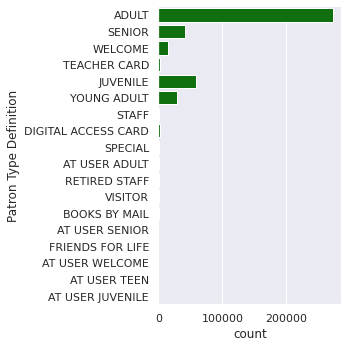

In [30]:
sns.catplot(y='Patron Type Definition',
            data=df, kind='count', color="green")

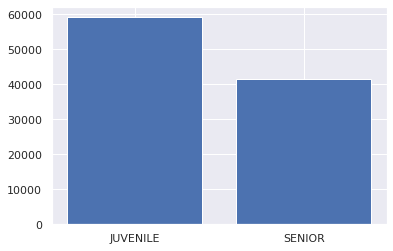

In [31]:
x = np.array(["JUVENILE", "SENIOR"])
y = np.array([59208, 41619])

plt.bar(x,y)
plt.show()

In [ ]:
#Antwort Frage 1: Wenn man Kinder mit der Kundenkennung "Juvenile" und Senioren mit der Kennung "Senior" betrachtet, ergibt sich, dass es 59208 registrierte Kinder und 41619 registrierte Senioren gibt.

In [33]:
#Frage 2: Wie viele Nutzer möchten per Mail informiert werden?

email = (df['Notice Preference Definition'] == 'email').sum()
email

323937

In [ ]:
#Antwort Frage 2: 323937 Kunden möchten per email benachrichtigt werden. 

In [34]:
#Frage 3: Wie viele Ausleihen werden im Mittel pro Altersgruppe und pro Jahr getätigt? Ist die Streuung zwischen den Gruppen gleich?

#Total Checkouts  und Age Range sind zu betrachten

#neuen df definieren, in dem die durchschnittlichen Ausleihen per Jahr beschrieben werden:

df['Circulation Active Year'] = pd.to_numeric(df['Circulation Active Year'], errors='coerce')
df['Membership Duration Years'] = (df['Circulation Active Year'] - df['Year Patron Registered'])+1 
# hier werden der Einfachheit ganze Jahre angenommen
df["Average Checkouts per Year"] =(df['Total Checkouts']/df['Membership Duration Years'])


In [35]:
#Welche Altersgruppen gibt es:

df['Age Range'].unique()

array(['20 to 24 years', '25 to 34 years', '45 to 54 years',
       '65 to 74 years', '60 to 64 years', '35 to 44 years', nan,
       '55 to 59 years', '10 to 19 years', '0 to 9 years',
       '75 years and over'], dtype=object)

<AxesSubplot:xlabel='Age Range', ylabel='Average Checkouts per Year'>

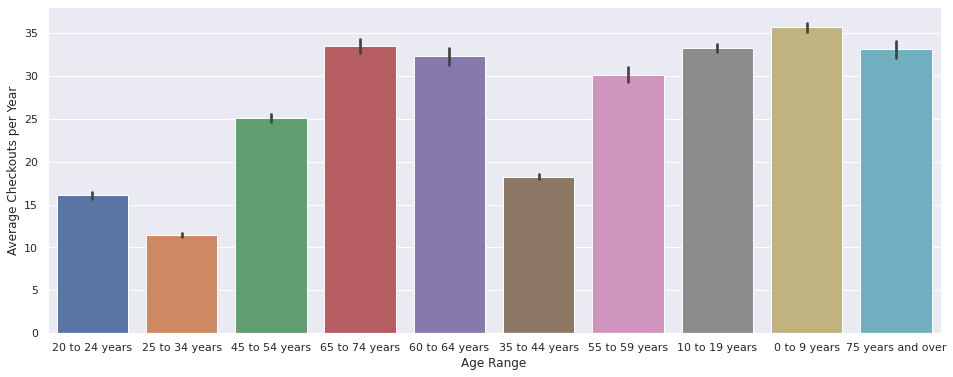

In [44]:
#Anzeige der durchschnittlichen Ausleihen pro Altersklasse:

plt.figure(figsize=(16, 6))
sns.barplot(y = 'Average Checkouts per Year', x = 'Age Range', data=df)

In [45]:
#Die Ergebnisse in einer Kreuztabelle anzeigen lassen:

pd.crosstab(
    df['Age Range'],
    df['Average Checkouts per Year'], 
    margins=True
)

Average Checkouts per Year,0.0,0.07142857142857142,0.07692307692307693,0.08333333333333333,0.09090909090909091,0.1,0.1111111111111111,0.125,0.14285714285714285,0.15384615384615385,...,1307.0,1318.3636363636363,1437.75,1533.0833333333333,1544.142857142857,1720.9285714285713,1868.0,2293.0,2564.785714285714,All
Age Range,,,,,,,,,,,,,,,,,,,,,
0 to 9 years,98,0,0,0,0,0,0,1,3,0,...,0,0,0,0,0,0,0,0,0,33830
10 to 19 years,290,0,0,1,0,3,5,7,24,0,...,0,0,0,0,0,0,0,0,0,51835
20 to 24 years,451,0,1,4,0,2,4,5,11,2,...,0,0,0,0,1,0,0,0,0,23960
25 to 34 years,1727,0,3,0,5,7,20,27,51,8,...,0,0,0,0,0,0,1,0,0,72590
35 to 44 years,1043,2,3,5,6,11,18,20,42,6,...,0,0,0,0,0,0,0,0,1,56438
45 to 54 years,765,3,6,9,9,8,18,33,42,7,...,0,0,0,0,0,1,0,0,0,44663
55 to 59 years,328,1,6,2,5,5,8,15,20,8,...,0,0,0,0,0,0,0,0,0,17802
60 to 64 years,319,3,1,1,6,4,3,11,23,4,...,0,0,0,0,0,0,0,0,0,16587
65 to 74 years,501,0,5,5,9,14,13,15,34,5,...,1,1,1,1,0,0,0,1,0,25251


In [55]:
#Streuung berechnen (Interquartilsabstand):

df['Average Checkouts per Year'].quantile(q=0.75) - df['Average Checkouts per Year'].quantile(q=0.25)

21.64835164835165

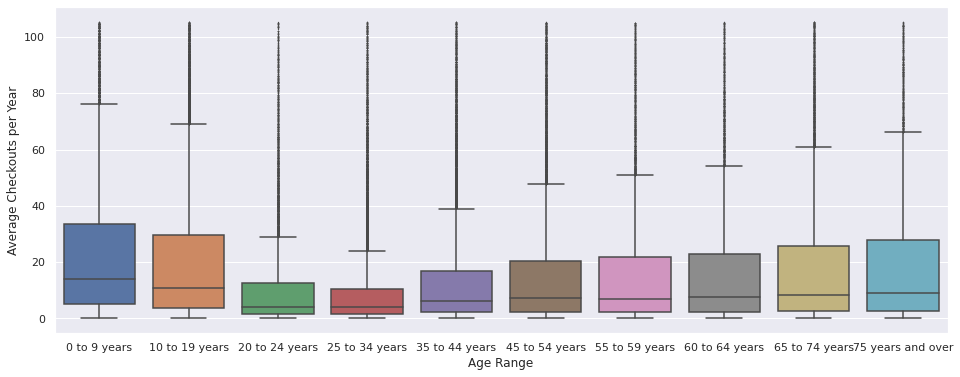

In [57]:
#Lösung aus Musterlösung:

plt.figure(figsize=(16, 6))
my_order =['0 to 9 years', '10 to 19 years', '20 to 24 years', '25 to 34 years', '35 to 44 years', '45 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 74 years', '75 years and over']

plt = sns.boxplot(y='Average Checkouts per Year', x='Age Range', data=df[df['Average Checkouts per Year']<df['Average Checkouts per Year'].quantile(0.95)], fliersize=0.5, whis=1.5, order =my_order)

In [ ]:
#Antwort Frage 3: Anhand des Balkendiagramms lässt sich erkennen, dass sich die Ausleihen in den einzelnen Altersgruppen nur wenig unterscheiden.
#Lediglich in der Altersgruppe von 20-44 Jahren gibt es weniger Ausleihen als im Durchschnitt.
#Auch der Interquartilsabstand von ca. 22% zeigt eine relativ geringe Streuung. 